In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

Reshape mnist data in order to fit keras input requirement

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

One hot encoding label Y

In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Initial y data: ', y_train[0])
print('y data after one-hot encoding ',Y_train[0])

Initial y data:  5
y data after one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Define model

In [6]:
model = Sequential()

Use convolution kernel with 32 kernel with size 3x3
Activation function is sigmoid using input shape from input layer

In [7]:
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

Add one more Convolution layer

In [8]:
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

Add one Max-Pooling layer:

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

Flatten layer and move from tensor to vector

In [10]:
model.add(Flatten())

Add one more fully connected layer with 128 nodes using sigmoid activation function:

In [11]:
model.add(Dense(128, activation='sigmoid'))

Output payer with 10 nodes and using softmax activation function to convert to probability:

In [12]:
model.add(Dense(10, activation='softmax'))

Compile model with Adam optimizer, cross_entropy loss function

In [13]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

Train model:

In [14]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3085 - accuracy: 0.9105 - val_loss: 0.0666 - val_accuracy: 0.9827
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0607 - accuracy: 0.9825 - val_loss: 0.0495 - val_accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0388 - accuracy: 0.9890 - val_loss: 0.0491 - val_accuracy: 0.9861
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0263 - accuracy: 0.9924 - val_loss: 0.0389 - val_accuracy: 0.9880
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0378 -

Plot output

In [15]:
fig = plt.figure()
numOfEpoch = 10

In [18]:
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
#plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
#plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03651927784085274, 0.9894999861717224]


In [20]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Forecast: ', np.argmax(y_predict))

Forecast:  7


In [21]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

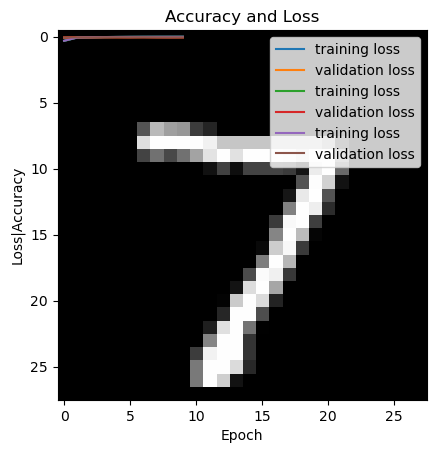

In [22]:
plt.show()